In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels as sm

In [3]:
df = pd.read_csv('Datasets/us_airline_carrier_passenger.csv')
df.head()

,month,passengers
0,2000-01-01,46492
1,2000-02-01,48526
2,2000-03-01,58764
3,2000-04-01,56033
4,2000-05-01,58201


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   month       240 non-null    object
 1   passengers  240 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.9+ KB


In [5]:
df['month'] = pd.to_datetime(df['month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   month       240 non-null    datetime64[ns]
 1   passengers  240 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.9 KB


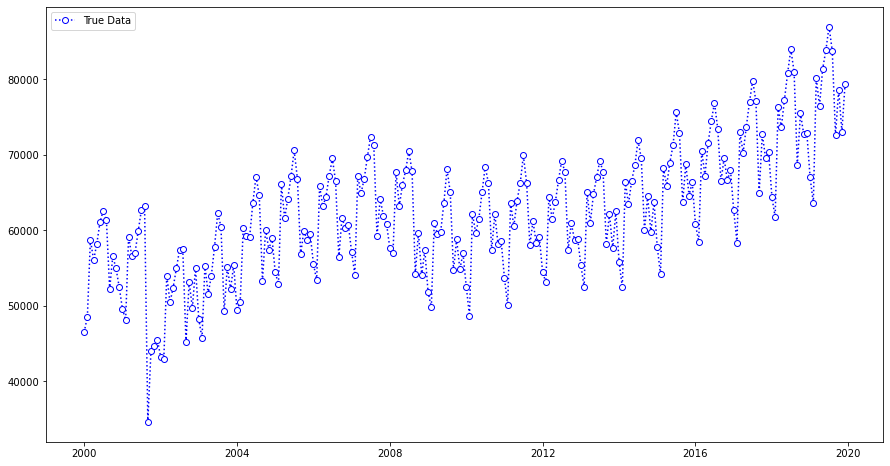

In [6]:
plt.figure(figsize=(15,8))
plt.plot(df['month'], df['passengers'], 'o:', color='blue', markerfacecolor='w')
plt.legend(['True Data'])
plt.show()

In [7]:
import datetime
df_train = df[df['month'] <= datetime.datetime.strptime('2016-12-01', '%Y-%m-%d')]
df_test = df[df['month'] > datetime.datetime.strptime('2016-12-01', '%Y-%m-%d')]

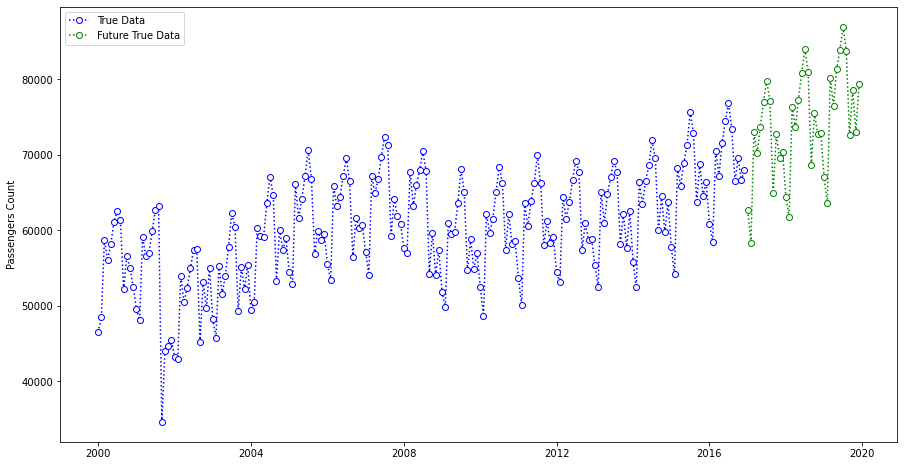

In [8]:
plt.figure(figsize=(15,8))
plt.plot(df_train['month'], df_train['passengers'], 'bo:', markerfacecolor='w')
plt.plot(df_test['month'], df_test['passengers'], 'go:', markerfacecolor='w')
plt.legend(['True Data', 'Future True Data'])
plt.ylabel('Passengers Count')
plt.show()

In [9]:
df_train.head()

,month,passengers
0,2000-01-01,46492
1,2000-02-01,48526
2,2000-03-01,58764
3,2000-04-01,56033
4,2000-05-01,58201


In [10]:
df_train['fitted_3'] = df_train['passengers'].ewm(min_periods=3, alpha=0.5)